
## ALL



## Hong Real Gen

* Gen new data with real model

tensor([[2054.3281,  633.9849,   32.9984]])

tensor([[2468.8032, 1781.9651,  110.9102]])


## Web application (NOT deployed yet)

Run interactively on the web at: 




## Inputs



(2, 'i_h2i_rate')

(3, 'i_h2_temp')

(4, 'i_ngi_rate')

(6, 'i_pci_rate')

(11, 'i_o2_volfract')

(12, 'i_hbtemp')

(13, 'i_wind_rt')


## Outputs


* desired output requirements 

Raceway flame temp 1900K-1800.....(19, 'o_fta')
 
Hot metal temp 1700K-1600........(21, 'o_hmt')

Top gas temp 120C-80C............(23, 'o_tgt')

(39, 'o_prod_rt')





In [2]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx


In [3]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid



In [4]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [5]:

import PDFshapingUtils as PDF_tk


In [6]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [7]:


PDFshapingOBJ.N_error_range = 5         ## 20
PDFshapingOBJ.mean_impulse  = 0.0       ## -7.0      ## 0.0
PDFshapingOBJ.std_impulse   = 0.001     ## 1.0
PDFshapingOBJ.kde_std       = 0.5       ## 0.1       ## 0.5      ## 3.0  ## smaller is better approximation?
PDFshapingOBJ.bandwidth     = 0.2       ## 0.2->more jagged, 2.0->more smooth


In [8]:

PDFshapingOBJ.initializeImpulseGaussian()


In [9]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.14.2025_REVISED.csv')


In [10]:

PDFshapingOBJ.CFD_raw_data


,Index,Case_Name,i_h2i_rate,i_h2_temp,i_ngi_rate,i_ng_temp,i_pci_rate,i_wpi_rate,i_sgi_rate,i_sgi_COH2ratio,...,o_co2_sollos,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt
0,1,H2-10_PCI-0_WPI-0_NG-0_O2-30_NGT-0_H2T-1200_HB...,10,1200,0,0,0,0,0,0,...,27.5,9.08,53.42225,188.0,407.0,1090.0,13.3,12.3,34.2,6230.0
1,2,H2-10_PCI-0_WPI-0_NG-0_O2-30_NGT-0_H2T-600_HBT...,10,600,0,0,0,0,0,0,...,28.3,9.23,51.71010,188.0,407.0,1100.0,13.2,12.2,34.1,6250.0
2,3,H2-10_PCI-0_WPI-0_NG-0_O2-30_NGT-0_H2T-300_HBT...,10,300,0,0,0,0,0,0,...,25.9,8.47,54.11249,188.0,407.0,1110.0,13.1,12.2,34.9,6250.0
3,4,H2-20_PCI-0_WPI-0_NG-0_O2-30_NGT-0_H2T-1200_HB...,20,1200,0,0,0,0,0,0,...,25.4,14.80,44.36503,206.0,446.0,1210.0,21.0,18.3,44.7,6840.0
4,5,H2-10_PCI-0_WPI-0_NG-0_O2-30_NGT-0_H2T-600_HBT...,10,600,0,0,0,0,0,0,...,25.9,8.46,56.56291,186.0,403.0,1090.0,13.3,12.1,34.7,6190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,947,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,100,300,0,0,0,0,...,20.9,19.20,52.23245,124.0,268.0,690.0,27.7,23.2,60.6,4090.0
947,948,H2-0_PCI-0_WPI-0_NG-60_O2-21_NGT-300_H2T-0_HBT...,0,0,60,300,0,0,0,0,...,31.6,14.90,46.71122,153.0,330.0,878.0,17.2,15.6,46.9,5060.0
948,949,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,120,300,0,0,0,0,...,17.7,20.00,44.92799,122.0,264.0,687.0,31.6,26.7,63.5,4050.0
949,950,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,100,300,0,0,0,0,...,26.4,18.90,46.49542,142.0,306.0,802.0,24.0,23.3,57.8,4700.0


In [11]:

PDFshapingOBJ.print_headers_list()


['Index', 'Case_Name', 'i_h2i_rate', 'i_h2_temp', 'i_ngi_rate', 'i_ng_temp', 'i_pci_rate', 'i_wpi_rate', 'i_sgi_rate', 'i_sgi_COH2ratio', 'i_sgi_ReProRatio', 'i_o2_volfract', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_fta', 'o_coke_rt', 'o_hmt', 'o_delp', 'o_tgt', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt']
40
(0, 'Index')
(1, 'Case_Name')
(2, 'i_h2i_rate')
(3, 'i_h2_temp')
(4, 'i_ngi_rate')
(5, 'i_ng_temp')
(6, 'i_pci_rate')
(7, 'i_wpi_rate')
(8, 'i_sgi_rate')
(9, 'i_sgi_COH2ratio')
(10, 'i_sgi_ReProRatio')
(11, 'i_o2_volfract')
(12, 'i_hbtemp')
(13, 'i_wind_rt')
(14, 'i_blastH2O')
(15, 'i_BdnH2O')
(16, 'o_tuy_velo')
(17, 'o_tuy_temp')
(18, 'o_burn')
(19, 'o_fta')
(20, 'o_coke_rt')
(21, 'o_hmt')
(22, 'o_delp')
(23, 'o_tgt')
(24, 'o_co_vf')
(25, 'o_co2_vf')
(26, 'o_h2_vf'

/home/maquina1/anaconda3/envs/py37_Constraints/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/maquina1/anaconda3/envs/py37_Constraints/lib/python3.7/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


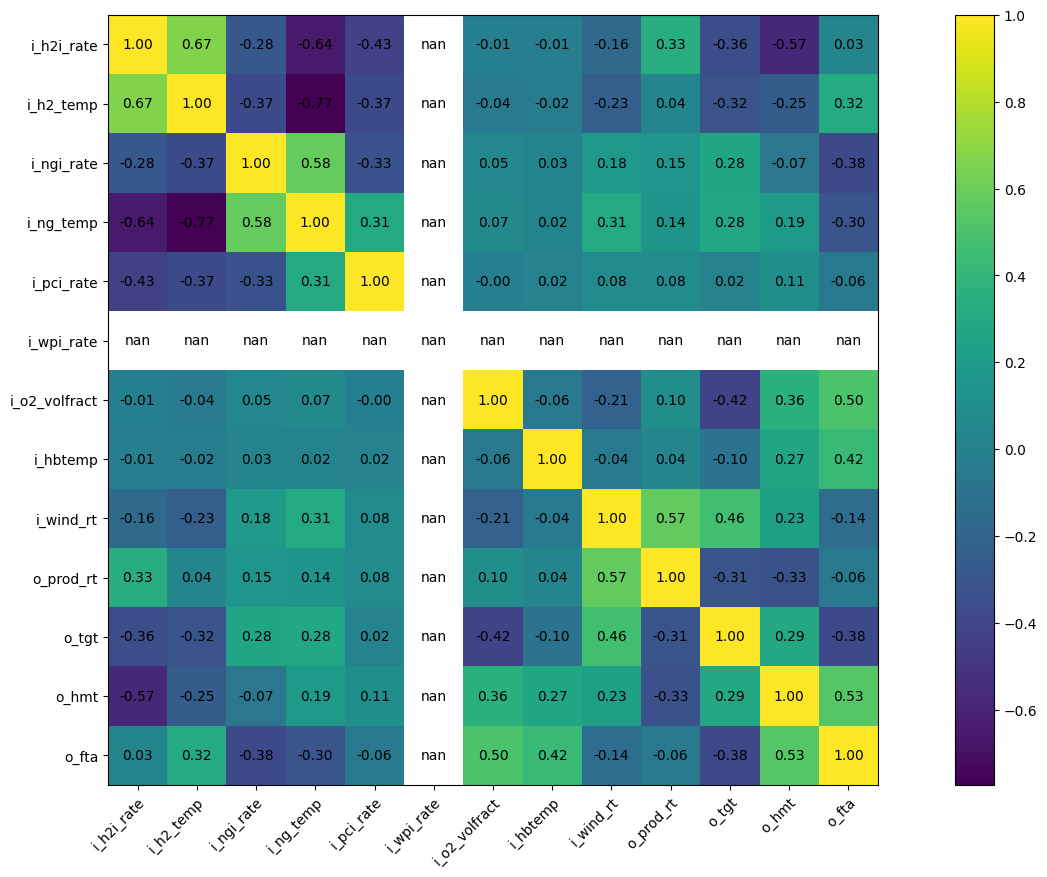

In [12]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [13]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1 'H2-10_PCI-0_WPI-0_NG-0_O2-30_NGT-0_H2T-1200_HBT-1200_WR-160' 10 ...
  12.3 34.2 6230.0]
 [2 'H2-10_PCI-0_WPI-0_NG-0_O2-30_NGT-0_H2T-600_HBT-1480_WR-160' 10 ...
  12.2 34.1 6250.0]
 [3 'H2-10_PCI-0_WPI-0_NG-0_O2-30_NGT-0_H2T-300_HBT-1600_WR-160' 10 ...
  12.2 34.9 6250.0]
 ...
 [949 'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195' 0 ...
  26.7 63.5 4050.0]
 [950 'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-230' 0 ...
  23.3 57.8 4700.0]
 [951 'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-230' 0 ...
  26.6 61.8 4610.0]]
(951, 40)


In [14]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [ 2, 3, 4, 6, 11, 12, 13 ] , 
                   outputs= [ 19, 21, 23, 39 ]   
)



7
4


In [15]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(951, 7)
(951, 4)


In [16]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [17]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(760, 7)
(191, 7)
(760, 4)
(191, 4)


In [18]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [19]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [20]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl


In [21]:


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(7, 4)       
        
        ## F2
        self.f2_linear1 = nn.Linear(7, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 4)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [22]:

n_inputs  = 7
n_outputs = 4


'''


    
class ResidualNet(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    
'''
    


"\n\n\n    \nclass ResidualNet(nn.Module):\n    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):\n        \n        super().__init__()\n        self.device = device\n        \n        self.x_means      = x_means.to(self.device)\n        self.x_deviations = x_deviations.to(self.device)\n        self.y_means      = y_means.to(self.device)\n        self.y_deviations = y_deviations.to(self.device)\n\n     \n        self.fc1  = nn.Linear(n_inputs, 64)\n        self.act1 = nn.ReLU()\n        self.dropout1 = nn.Dropout(dropout_rate)\n\n        self.fc2 = nn.Linear(64, 64)\n        self.act2 = nn.ReLU()\n        self.dropout2 = nn.Dropout(dropout_rate)\n\n        self.fc3 = nn.Linear(64, n_outputs)\n\n        # If input_dim ≠ 64, project for residual addition\n        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()\n        \n        # Move model to device\n        self.to(self.device)\n        \n\n    def forward

In [23]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model     = F1plusF2_SIO(
             PDFshapingOBJ.x_means, 
             PDFshapingOBJ.x_deviations, 
             PDFshapingOBJ.y_means, 
             PDFshapingOBJ.y_deviations,
             device=device  # pass device into the model
    
)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [24]:

model.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model.device)
        yb = yb.to(model.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.6309388875961304
100 ..... 0.12597596645355225
200 ..... 0.18211723864078522
300 ..... 0.16806045174598694
400 ..... 0.15308386087417603
500 ..... 0.9359726905822754
600 ..... 0.05978376418352127
700 ..... 0.17508673667907715
800 ..... 0.08307629823684692
900 ..... 0.0929146260023117


In [25]:


print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[2263.5657, 1205.1747,   71.8418, 7922.0659]])
y_deviations: tensor([[ 207.0747,  574.7966,   38.9351, 1408.4434]])
x_means: tensor([[  12.8289,  249.8684,   40.7474,   27.5829,   25.4461, 1438.4736,
          189.5197]])
x_deviations: tensor([[ 15.2804, 347.3977,  42.0209,  53.7521,   3.3018, 159.9994,  25.9231]])


In [26]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[2056.4910,  630.3781,   32.9067, 6513.6226]])
tensor([[2470.6404, 1779.9713,  110.7770, 9330.5098]])



## Constraints Optimization



* desired output requirements
* Raceway flame temp 2600k - 2700K...........(17, 'o_fta')
* Hot metal temp      1800 - 1830K...........(21, 'o_hmt')
* Top gas temp         70 - 80C............(23, 'o_tgt')
* production rate , 39 



In [28]:


def gen_synthetic_samples_from_RealHong():
  

    sampled_input_dist  = PDFshapingOBJ.sample_input_from_dist_fn()
    

    model.eval()
    with torch.no_grad():
        
        final_input     = sampled_input_dist
      
        final_output, _ = model( final_input )

        
    final_input_np     = final_input.cpu().numpy()
    final_output_np    = final_output.cpu().numpy()
    

    os.makedirs("SyntheticCorpus", exist_ok=True)

    
    for i in range(final_input_np.shape[0]):
        
        ####################################################
       
        clamp_min_val   = np.round(final_input_np[i], 3)
        
        final_input_val = np.round(final_input_np[i], 3)
        
        clamp_max_val   = np.round(final_input_np[i], 3)
        
        ####################################################
    
    
        lower_bounds_val = np.round(final_output_np[i], 3)
        
        final_output_val = np.round(final_output_np[i], 3)
        
        upper_bounds_val = np.round(final_output_np[i], 3)
        
        ####################################################
    
        rec = {
            "clamp_min":        clamp_min_val.tolist(),
            "final_input":      final_input_val.tolist(),
            "clamp_max":        clamp_max_val.tolist(),
            "lower_bounds_glob": (lower_bounds_val.tolist()
                              if hasattr(lower_bounds_val, "tolist") else list(lower_bounds_val)),
            "final_output":     final_output_val.tolist(),
            "upper_bounds_glob": (upper_bounds_val.tolist()
                              if hasattr(upper_bounds_val, "tolist") else list(upper_bounds_val)),
        }
        
        fname = f"sample_{time.strftime('%Y%m%d-%H%M%S')}_{uuid.uuid4().hex[:6]}.json"
        with open(os.path.join("SyntheticCorpus", fname), "w", encoding="utf-8") as f:
            json.dump(rec, f, separators=(",", ":"))

    



In [29]:

## 100

for j in range( 100 ):
    gen_synthetic_samples_from_RealHong()
    print("generated so far: ", (j+1)*32 )


generated so far:  32
generated so far:  64
generated so far:  96
generated so far:  128
generated so far:  160
generated so far:  192
generated so far:  224
generated so far:  256
generated so far:  288
generated so far:  320
generated so far:  352
generated so far:  384
generated so far:  416
generated so far:  448
generated so far:  480
generated so far:  512
generated so far:  544
generated so far:  576
generated so far:  608
generated so far:  640
generated so far:  672
generated so far:  704
generated so far:  736
generated so far:  768
generated so far:  800
generated so far:  832
generated so far:  864
generated so far:  896
generated so far:  928
generated so far:  960
generated so far:  992
generated so far:  1024
generated so far:  1056
generated so far:  1088
generated so far:  1120
generated so far:  1152
generated so far:  1184
generated so far:  1216
generated so far:  1248
generated so far:  1280
generated so far:  1312
generated so far:  1344
generated so far:  1376
ge

In [30]:


df_synthetic_data_for_inverse = PDFshapingOBJ.load_synth_folder_to_pandas("SyntheticCorpus", flatten=True)

## df.to_csv("SyntheticCorpus/corpus_flat.csv", index=False) 


In [31]:

df_synthetic_data_for_inverse 


,clamp_min_0,clamp_min_1,clamp_min_2,clamp_min_3,clamp_min_4,clamp_min_5,clamp_min_6,final_input_0,final_input_1,final_input_2,...,lower_bounds_glob_2,lower_bounds_glob_3,final_output_0,final_output_1,final_output_2,final_output_3,upper_bounds_glob_0,upper_bounds_glob_1,upper_bounds_glob_2,upper_bounds_glob_3
0,6.291000,0.000000,99.461998,41.283001,24.423000,1301.963989,195.013000,6.291000,0.000000,99.461998,...,77.660004,8857.799805,1969.712036,618.918030,77.660004,8857.799805,1969.712036,618.918030,77.660004,8857.799805
1,19.320999,461.717987,37.470001,23.632000,24.093000,1495.265991,186.029007,19.320999,461.717987,37.470001,...,58.433998,8320.955078,2248.246094,906.635986,58.433998,8320.955078,2248.246094,906.635986,58.433998,8320.955078
2,14.171000,0.000000,122.396004,0.000000,26.806000,1288.738037,180.975998,14.171000,0.000000,122.396004,...,66.882004,8721.851562,1953.932983,496.412994,66.882004,8721.851562,1953.932983,496.412994,66.882004,8721.851562
3,21.112000,549.929993,38.831001,0.000000,22.920000,1337.751953,154.199997,21.112000,549.929993,38.831001,...,49.710999,6908.180176,2097.268066,409.562988,49.710999,6908.180176,2097.268066,409.562988,49.710999,6908.180176
4,9.717000,76.620003,55.382000,0.000000,25.549999,1073.092041,229.688004,9.717000,76.620003,55.382000,...,106.440002,8757.669922,2047.034058,1225.357056,106.440002,8757.669922,2047.034058,1225.357056,106.440002,8757.669922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19353,0.000000,166.414993,56.646999,84.494003,25.632000,1577.437012,205.145004,0.000000,166.414993,56.646999,...,72.500000,8875.611328,2348.844971,1467.176025,72.500000,8875.611328,2348.844971,1467.176025,72.500000,8875.611328
19354,4.545000,0.000000,41.820999,54.772999,29.896999,956.083984,182.190994,4.545000,0.000000,41.820999,...,50.326000,8072.662109,2109.927979,947.799011,50.326000,8072.662109,2109.927979,947.799011,50.326000,8072.662109
19355,0.000000,0.000000,76.180000,81.362000,27.896999,1308.463989,199.899994,0.000000,0.000000,76.180000,...,64.889999,9133.060547,2198.572998,1116.667969,64.889999,9133.060547,2198.572998,1116.667969,64.889999,9133.060547
19356,0.000000,0.000000,101.643997,19.542999,28.725000,1451.311035,177.837006,0.000000,0.000000,101.643997,...,59.289001,7898.124023,2279.156006,1364.418945,59.289001,7898.124023,2279.156006,1364.418945,59.289001,7898.124023



## NEXT PART



## Train Real Gen Inverse Model 

* real data gen

## Web application 

Run interactively on the web at: 


## Inputs


* desired output requirements 

Raceway flame temp > 1900K.....(19, 'o_fta')
 
Hot metal temp > 1700K........(21, 'o_hmt')

Top gas temp > 100C,,,,,,,,,,,(23, 'o_tgt')

production rate ..............(39, 'o_prod_rt')


## Outputs



(2, 'i_h2i_rate')

(3, 'i_h2_temp')

(4, 'i_ngi_rate')

(6, 'i_pci_rate')

(11, 'i_o2_volfract')

(12, 'i_hbtemp')

(13, 'i_wind_rt')








In [32]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx


In [33]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [34]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [35]:

import PDFshapingUtils as PDF_tk


In [36]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [37]:

PDFshapingOBJ.N_error_range = 5         ## 20
PDFshapingOBJ.mean_impulse  = 0.0       ## -7.0      ## 0.0
PDFshapingOBJ.std_impulse   = 0.001     ## 1.0
PDFshapingOBJ.kde_std       = 0.5       ## 0.1       ## 0.5      ## 3.0  ## smaller is better approximation?
PDFshapingOBJ.bandwidth     = 0.2       ## 0.2->more jagged, 2.0->more smooth


In [38]:

PDFshapingOBJ.initializeImpulseGaussian()


In [39]:

df_synthetic_data_for_inverse = PDFshapingOBJ.load_synth_folder_to_pandas("SyntheticCorpus", flatten=True)


In [40]:


PDFshapingOBJ.CFD_raw_data = df_synthetic_data_for_inverse 


In [41]:

PDFshapingOBJ.headers_list = PDFshapingOBJ.CFD_raw_data.columns.values.tolist()


In [42]:

PDFshapingOBJ.CFD_raw_data


,clamp_min_0,clamp_min_1,clamp_min_2,clamp_min_3,clamp_min_4,clamp_min_5,clamp_min_6,final_input_0,final_input_1,final_input_2,...,lower_bounds_glob_2,lower_bounds_glob_3,final_output_0,final_output_1,final_output_2,final_output_3,upper_bounds_glob_0,upper_bounds_glob_1,upper_bounds_glob_2,upper_bounds_glob_3
0,6.291000,0.000000,99.461998,41.283001,24.423000,1301.963989,195.013000,6.291000,0.000000,99.461998,...,77.660004,8857.799805,1969.712036,618.918030,77.660004,8857.799805,1969.712036,618.918030,77.660004,8857.799805
1,19.320999,461.717987,37.470001,23.632000,24.093000,1495.265991,186.029007,19.320999,461.717987,37.470001,...,58.433998,8320.955078,2248.246094,906.635986,58.433998,8320.955078,2248.246094,906.635986,58.433998,8320.955078
2,14.171000,0.000000,122.396004,0.000000,26.806000,1288.738037,180.975998,14.171000,0.000000,122.396004,...,66.882004,8721.851562,1953.932983,496.412994,66.882004,8721.851562,1953.932983,496.412994,66.882004,8721.851562
3,21.112000,549.929993,38.831001,0.000000,22.920000,1337.751953,154.199997,21.112000,549.929993,38.831001,...,49.710999,6908.180176,2097.268066,409.562988,49.710999,6908.180176,2097.268066,409.562988,49.710999,6908.180176
4,9.717000,76.620003,55.382000,0.000000,25.549999,1073.092041,229.688004,9.717000,76.620003,55.382000,...,106.440002,8757.669922,2047.034058,1225.357056,106.440002,8757.669922,2047.034058,1225.357056,106.440002,8757.669922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19353,0.000000,166.414993,56.646999,84.494003,25.632000,1577.437012,205.145004,0.000000,166.414993,56.646999,...,72.500000,8875.611328,2348.844971,1467.176025,72.500000,8875.611328,2348.844971,1467.176025,72.500000,8875.611328
19354,4.545000,0.000000,41.820999,54.772999,29.896999,956.083984,182.190994,4.545000,0.000000,41.820999,...,50.326000,8072.662109,2109.927979,947.799011,50.326000,8072.662109,2109.927979,947.799011,50.326000,8072.662109
19355,0.000000,0.000000,76.180000,81.362000,27.896999,1308.463989,199.899994,0.000000,0.000000,76.180000,...,64.889999,9133.060547,2198.572998,1116.667969,64.889999,9133.060547,2198.572998,1116.667969,64.889999,9133.060547
19356,0.000000,0.000000,101.643997,19.542999,28.725000,1451.311035,177.837006,0.000000,0.000000,101.643997,...,59.289001,7898.124023,2279.156006,1364.418945,59.289001,7898.124023,2279.156006,1364.418945,59.289001,7898.124023


In [43]:

PDFshapingOBJ.print_headers_list()


['clamp_min_0', 'clamp_min_1', 'clamp_min_2', 'clamp_min_3', 'clamp_min_4', 'clamp_min_5', 'clamp_min_6', 'final_input_0', 'final_input_1', 'final_input_2', 'final_input_3', 'final_input_4', 'final_input_5', 'final_input_6', 'clamp_max_0', 'clamp_max_1', 'clamp_max_2', 'clamp_max_3', 'clamp_max_4', 'clamp_max_5', 'clamp_max_6', 'lower_bounds_glob_0', 'lower_bounds_glob_1', 'lower_bounds_glob_2', 'lower_bounds_glob_3', 'final_output_0', 'final_output_1', 'final_output_2', 'final_output_3', 'upper_bounds_glob_0', 'upper_bounds_glob_1', 'upper_bounds_glob_2', 'upper_bounds_glob_3']
33
(0, 'clamp_min_0')
(1, 'clamp_min_1')
(2, 'clamp_min_2')
(3, 'clamp_min_3')
(4, 'clamp_min_4')
(5, 'clamp_min_5')
(6, 'clamp_min_6')
(7, 'final_input_0')
(8, 'final_input_1')
(9, 'final_input_2')
(10, 'final_input_3')
(11, 'final_input_4')
(12, 'final_input_5')
(13, 'final_input_6')
(14, 'clamp_max_0')
(15, 'clamp_max_1')
(16, 'clamp_max_2')
(17, 'clamp_max_3')
(18, 'clamp_max_4')
(19, 'clamp_max_5')
(20, 'c

In [44]:


PDFshapingOBJ.convert_pd_data_to_numpy()


[[   6.29099989    0.           99.46199799 ...  618.91802979
    77.66000366 8857.79980469]
 [  19.32099915  461.71798706   37.47000122 ...  906.63598633
    58.43399811 8320.95507812]
 [  14.17099953    0.          122.39600372 ...  496.41299438
    66.88200378 8721.8515625 ]
 ...
 [   0.            0.           76.18000031 ... 1116.66796875
    64.88999939 9133.06054688]
 [   0.            0.          101.64399719 ... 1364.41894531
    59.28900146 7898.12402344]
 [  29.23800087   61.90800095    8.85299969 ...  381.2250061
    45.05099869 8281.6015625 ]]
(19358, 33)


In [45]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [ 25, 26, 27, 28 ] ,  
                   outputs= [  7, 8, 9, 10, 11, 12, 13 ]   
)



4
7


In [46]:


print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(19358, 4)
(19358, 7)


In [47]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [48]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(15486, 4)
(3872, 4)
(15486, 7)
(3872, 7)


In [49]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [50]:


PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [51]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



In [52]:


n_inputs  = 4
n_outputs = 7

'''

class ResidualNet(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    
'''


"\n\nclass ResidualNet(nn.Module):\n    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):\n        \n        super().__init__()\n        self.device = device\n        \n        self.x_means      = x_means.to(self.device)\n        self.x_deviations = x_deviations.to(self.device)\n        self.y_means      = y_means.to(self.device)\n        self.y_deviations = y_deviations.to(self.device)\n\n     \n        self.fc1  = nn.Linear(n_inputs, 64)\n        self.act1 = nn.ReLU()\n        self.dropout1 = nn.Dropout(dropout_rate)\n\n        self.fc2 = nn.Linear(64, 64)\n        self.act2 = nn.ReLU()\n        self.dropout2 = nn.Dropout(dropout_rate)\n\n        self.fc3 = nn.Linear(64, n_outputs)\n\n        # If input_dim ≠ 64, project for residual addition\n        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()\n        \n        # Move model to device\n        self.to(self.device)\n        \n\n    def forward(self, x

In [53]:




#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(4, 7)       
        
        ## F2
        self.f2_linear1 = nn.Linear(4, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 7)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [54]:


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model     = F1plusF2_SIO(
             PDFshapingOBJ.x_means, 
             PDFshapingOBJ.x_deviations, 
             PDFshapingOBJ.y_means, 
             PDFshapingOBJ.y_deviations,
             device=device  # pass device into the model
    
)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [55]:


model.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model.device)
        yb = yb.to(model.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    




0 ..... 0.7789812684059143
100 ..... 0.3103145658969879
200 ..... 0.47925469279289246
300 ..... 0.37316223978996277
400 ..... 0.4546051025390625
500 ..... 0.4686388075351715
600 ..... 0.3560466766357422
700 ..... 0.513843834400177
800 ..... 0.32884714007377625
900 ..... 0.5156871676445007


In [56]:


print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)




=== SANITY CHECK: SCALING ===
y_means: tensor([[  14.5584,  302.9449,   45.2276,   36.9842,   25.5392, 1434.0400,
          190.2866]])
y_deviations: tensor([[ 12.5682, 281.0350,  36.3510,  39.6328,   3.3381, 159.0293,  25.8330]])
x_means: tensor([[2247.0852, 1041.0010,   63.6902, 8428.7334]])
x_deviations: tensor([[ 177.2226,  507.5201,   22.3225, 1170.4115]])


In [57]:

print( PDFshapingOBJ.X_test_tr[0] )
print( PDFshapingOBJ.y_test_tr[0] )



tensor([2386.2971, 1507.6169,   74.8980, 9472.2275])
tensor([  19.3550,  304.6910,   11.0470,   10.1560,   24.2430, 1529.7140,
         231.2480])


In [58]:


print( PDFshapingOBJ.X_test_tr.shape )
print( PDFshapingOBJ.y_test_tr.shape )

with torch.no_grad():
    
    pred_test_descaled, pred_test_scaled = model(  PDFshapingOBJ.X_test_tr  )


torch.Size([3872, 4])
torch.Size([3872, 7])


In [59]:


y_true = PDFshapingOBJ.y_test_tr.detach().cpu().numpy()

y_pred = pred_test_descaled.detach().cpu().numpy()  # or use descaled pair

mae  = mean_absolute_error(y_true, y_pred, multioutput='raw_values')
rmse = mean_squared_error( y_true, y_pred, squared=False, multioutput='raw_values')
r2   = r2_score(           y_true, y_pred, multioutput='raw_values')

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print("Overall averages:", 
      mae.mean(), rmse.mean(), r2.mean())



MAE: [  5.001176  135.76338    23.303185   31.015533    0.8827627 100.49188
   4.2089252]
RMSE: [  6.3720665 171.11403    28.912615   37.87183     1.171076  126.19981
   5.4096684]
R2: [0.75508211 0.63992597 0.38366024 0.07732377 0.87351491 0.37926004
 0.95559398]
Overall averages: 42.95241 53.86444 0.5806230039163128


In [60]:

r2   = r2_score(           y_true, y_pred, multioutput='raw_values')
r2



array([0.75508211, 0.63992597, 0.38366024, 0.07732377, 0.87351491,
       0.37926004, 0.95559398])

In [61]:

r2.mean()



0.5806230039163128

In [62]:

print('Testing R**2 - descaled:', r2_score( y_pred, y_true   )  )


Testing R**2 - descaled: -1.2310570603885065


In [63]:

print('Testing R**2 - descaled:', r2_score( y_true,  y_pred   )  )


Testing R**2 - descaled: 0.5806230039163128


In [64]:

PDFshapingOBJ.r2_score_torch(PDFshapingOBJ.y_test_tr.to(PDFshapingOBJ.device), pred_test_descaled).mean()


tensor(0.5806, device='cuda:0')

In [65]:


import torch

# Your trained model
model.eval().float()


dummy_input = torch.randn(1, 4, dtype=torch.float32)

# Export to ONNX (single output called "output1")
torch.onnx.export(
    model,
    dummy_input,
    "ONNXmodels/F1F2_Inverse_HongRealGen.onnx",
    input_names=["input1"],
    output_names=["output1"],
    opset_version=15,              # fine for onnxruntime-web
    do_constant_folding=True,
    dynamic_axes={
        "input1": {0: "batch"},
        "output1": {0: "batch"}
    }
)
print("ONNX model saved")



ONNX model saved


In [66]:

regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)


In [67]:

regressor.fit(PDFshapingOBJ.X_train, PDFshapingOBJ.y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [68]:

print( len(PDFshapingOBJ.X_train  ))
print( len(PDFshapingOBJ.y_train  ))


15486
15486


In [69]:


print( PDFshapingOBJ.X_train.shape  )
print( PDFshapingOBJ.y_train.shape  )


(15486, 4)
(15486, 7)


In [70]:

y_pred = regressor.predict(PDFshapingOBJ.X_test )


In [71]:

y_pred


array([[  11.295506,  268.05237 ,   40.709534, ...,   25.539145,
        1577.7296  ,  223.58678 ],
       [  13.978869,  218.90462 ,   50.50074 , ...,   26.02245 ,
        1366.7598  ,  183.93156 ],
       [  44.042614, 1052.0435  ,   12.378497, ...,   17.326672,
        1402.5608  ,  163.84558 ],
       ...,
       [  27.791536,  492.65445 ,   27.881643, ...,   20.833096,
        1396.704   ,  188.92181 ],
       [  22.55271 ,  489.608   ,   37.663403, ...,   31.316555,
        1445.4894  ,  158.69939 ],
       [  30.801575,  415.33298 ,   74.2194  , ...,   23.78876 ,
        1357.7616  ,  208.58633 ]], dtype=float32)

In [72]:

r2_score( PDFshapingOBJ.y_test, y_pred )


0.5799534565321481